## Parte 0

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import scatter_matrix

# Algoritmi
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

## Parte 1

### Punto 1.1

In [2]:
path = 'BankMarketingDataSet.csv'
dataset = pd.read_csv(path, sep = ';', encoding='utf-8')
dataset.head()

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no


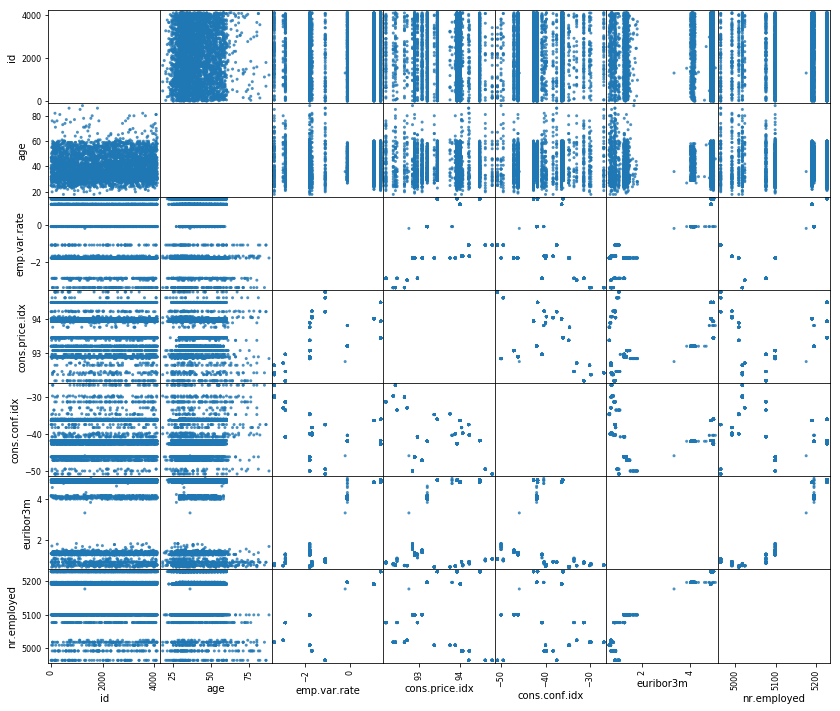

In [3]:
scatter_matrix(dataset, figsize=(14, 12), alpha = 0.8, diagonal = 'kda')
plt.show()

### Punto 1.2

In [4]:
num_istanze = dataset.shape[0]
print('Numero istanze:', num_istanze)

missing_values = dataset.isna().sum().any()
print('Sono presenti \'missing value\':', missing_values)

classe = dataset.groupby('y').size()
classe_yes = classe['yes']
classe_no = classe['no']
print('*' * 100)
print('Numero di YES:', classe_yes)
print('Numero di NO:', classe_no)

Numero istanze: 4119
Sono presenti 'missing value': False
****************************************************************************************************
Numero di YES: 451
Numero di NO: 3668


### Punto 1.3

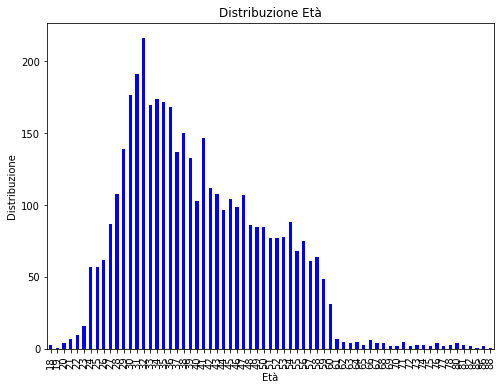

In [5]:
age = dataset.groupby('age').size()
age.plot(figsize=(8, 6), kind = 'bar', colormap = 'winter')
plt.title('Distribuzione Età')
plt.xlabel('Età')
plt.ylabel('Distribuzione')
plt.show()

### Punto 1.4

In [6]:
mean = dataset.groupby(['marital', 'y']).mean()
mean = mean.round(decimals = 2)
mean.drop('id', axis = 1, inplace = True)

median = dataset.groupby(['marital', 'y']).median()
median = median.round(decimals = 2)
median.drop('id', axis = 1, inplace = True)
mean

age  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
marital  y                                                                    
divorced no   44.74          0.29           93.62         -40.56       3.89   
         yes  48.53         -1.27           93.42         -41.24       1.99   
married  no   41.96          0.32           93.62         -40.42       3.90   
         yes  46.27         -1.13           93.41         -39.77       2.23   
single   no   33.25          0.05           93.54         -40.98       3.56   
         yes  32.96         -1.25           93.44         -39.43       2.03   
unknown  no   42.90          0.06           93.55         -40.05       3.74   
         yes  36.00          1.40           93.44         -36.10       4.96   

              nr.employed  
marital  y                 
divorced no       5178.80  
         yes      5089.05  
married  no       5178.69  
         yes      5099.41  
single   no       5167.03  
         yes      5083.14  
unknown  no       5169.04  
         yes      5228.10

In [7]:
median

age  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
marital  y                                                                   
divorced no   45.0           1.1           93.92         -41.80       4.86   
         yes  47.0          -1.8           93.20         -42.00       1.26   
married  no   41.0           1.1           93.92         -41.80       4.86   
         yes  44.5          -1.8           93.41         -40.35       1.27   
single   no   32.0           1.1           93.44         -42.00       4.86   
         yes  31.0          -1.7           93.37         -40.00       1.24   
unknown  no   36.0           1.1           93.68         -38.60       4.86   
         yes  36.0           1.4           93.44         -36.10       4.96   

              nr.employed  
marital  y                 
divorced no        5195.8  
         yes       5099.1  
married  no        5195.8  
         yes       5099.1  
single   no        5195.8  
         yes       5076.2  
unknown  no        5191.0  
         yes       5228.1

In [8]:
corr = dataset.groupby(['y', 'marital']).corr()
corr.drop('id', axis = 1, inplace = True)
corr

age  cons.conf.idx  cons.price.idx  \
y   marital                                                            
no  divorced age             1.000000       0.067484       -0.076926   
             cons.conf.idx   0.067484       1.000000        0.156699   
             cons.price.idx -0.076926       0.156699        1.000000   
             emp.var.rate   -0.199581       0.274889        0.820863   
             euribor3m      -0.190424       0.339336        0.753569   
             id              0.041680       0.130344        0.002307   
             nr.employed    -0.244489       0.132232        0.634973   
    married  age             1.000000       0.111907       -0.036481   
             cons.conf.idx   0.111907       1.000000        0.153659   
             cons.price.idx -0.036481       0.153659        1.000000   
             emp.var.rate   -0.040861       0.349981        0.778736   
             euribor3m      -0.038974       0.421687        0.702597   
             id              0.048844      -0.007237       -0.003989   
             nr.employed    -0.064570       0.235995        0.547041   
    single   age             1.000000       0.029216        0.045173   
             cons.conf.idx   0.029216       1.000000        0.057363   
             cons.price.idx  0.045173       0.057363        1.000000   
             emp.var.rate    0.090487       0.233394        0.769770   
             euribor3m       0.100826       0.325512        0.688001   
             id              0.017874       0.045050       -0.020885   
             nr.employed     0.097084       0.172152        0.514284   
    unknown  age             1.000000       0.141714        0.341064   
             cons.conf.idx   0.141714       1.000000        0.731608   
             cons.price.idx  0.341064       0.731608        1.000000   
             emp.var.rate    0.076795       0.698992        0.874128   
             euribor3m       0.058199       0.770527        0.873910   
             id             -0.171834      -0.199473        0.121180   
             nr.employed    -0.093955       0.617031        0.744175   
yes divorced age             1.000000       0.337553        0.018586   
             cons.conf.idx   0.337553       1.000000       -0.313154   
             cons.price.idx  0.018586      -0.313154        1.000000   
             emp.var.rate   -0.178743      -0.398005        0.632638   
             euribor3m      -0.135406      -0.217575        0.349717   
             id              0.108983       0.015962       -0.270542   
             nr.employed    -0.232122      -0.310648        0.001604   
    married  age             1.000000       0.090478        0.040304   
             cons.conf.idx   0.090478       1.000000       -0.304695   
             cons.price.idx  0.040304      -0.304695        1.000000   
             emp.var.rate   -0.118748      -0.249023        0.680882   
             euribor3m      -0.189410      -0.117213        0.455434   
             id             -0.027084       0.134457       -0.198364   
             nr.employed    -0.237479      -0.199589        0.176283   
    single   age             1.000000       0.085356       -0.035174   
             cons.conf.idx   0.085356       1.000000       -0.384473   
             cons.price.idx -0.035174      -0.384473        1.000000   
             emp.var.rate    0.064289      -0.288184        0.616985   
             euribor3m       0.125069      -0.152513        0.319579   
             id             -0.074598       0.030032       -0.219545   
             nr.employed     0.143061      -0.161295        0.008029   
    unknown  age                  NaN            NaN             NaN   
             cons.conf.idx        NaN            NaN             NaN   
             cons.price.idx       NaN            NaN             NaN   
             emp.var.rate         NaN            NaN             NaN   
             euribor3m            NaN            NaN             NaN   
  

### Punto 1.5

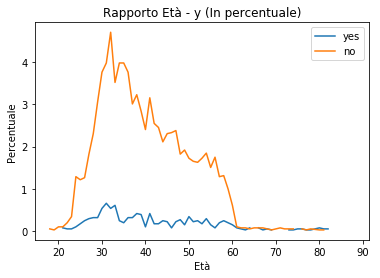

In [9]:
age = dataset.groupby(['age','y']).size().unstack()
percentuale_yes = (age['yes'] / num_istanze) * 100
percentuale_no = (age['no'] / num_istanze) * 100

percentuale = pd.concat([percentuale_yes, percentuale_no], axis = 1)
percentuale.plot()
plt.title('Rapporto Età - y (In percentuale)')
plt.xlabel('Età')
plt.ylabel('Percentuale')
plt.show()

## Parte 2

### Punto 2.1

In [10]:
# Copio il dataset per evitare problemi se rieseguo
df = dataset.copy()
dict_u = {'unknown': np.nan}
df = df.replace(dict_u)
df = df.dropna()

# Verifico se l'operazione è andata a buon fine
def print_type(dataFrame: pd.DataFrame):
    for column in dataFrame.columns:
        if dataFrame[column].dtypes == 'object':
            print(column, ': ',np.unique(dataFrame[column]))

# Print
print('*' * 100)
print('Nuovo Dataframe')
print_type(df)
print('*' * 100)
print('Dataframe Precedente')
print_type(dataset)


# Per convertire i lavori uso LabelEncoder
label = LabelEncoder()
def encoding(dataFrame: pd.DataFrame):
    for column in dataFrame.columns:
        if(dataFrame[column].dtypes == 'object'):
            dataFrame[column] = dataFrame[[column]].apply(label.fit_transform)
            
df_enc = df.copy()
encoding(df_enc)
print('*' * 100)
print('Dataframe Encoding')
df_enc.head()

****************************************************************************************************
Nuovo Dataframe
job :  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital :  ['divorced' 'married' 'single']
education :  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree']
default :  ['no' 'yes']
housing :  ['no' 'yes']
loan :  ['no' 'yes']
y :  ['no' 'yes']
****************************************************************************************************
Dataframe Precedente
job :  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital :  ['divorced' 'married' 'single' 'unknown']
education :  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default :  ['no' 'unknown' 'ye

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,1,1,2,0,1,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,2,39,7,2,3,0,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,3,25,7,1,3,0,1,0,1.4,94.465,-41.8,4.962,5228.1,0
4,5,47,0,1,6,0,1,0,-0.1,93.200,-42.0,4.191,5195.8,0
5,6,32,7,2,6,0,0,0,-1.1,94.199,-37.5,0.884,4963.6,0


### Punto 2.2

In [11]:
# Uso il dataset trasformato
test_size = 0.25
X = df_enc.drop('y', axis = 1)
Y = df_enc['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = test_size, random_state = 0)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
score_train = decision_tree.score(X_train, Y_train)
score_test = decision_tree.score(X_test, Y_test)
print('Accuracy TRAIN DECISION TREE: {:.3f}'.format(score_train))
print('Accuracy TEST DECISION TREE: {:.3f}'.format(score_test))
print('*' * 100)

#Confusion Matrix
y_pred_DT = decision_tree.predict(X_test)
cm_DT = confusion_matrix(Y_test, y_pred_DT)
print('Confusion Matrix DECISION TREE:\n', cm_DT)

Accuracy TRAIN DECISION TREE: 1.000
Accuracy TEST DECISION TREE: 0.802
****************************************************************************************************
Confusion Matrix DECISION TREE:
 [[595  96]
 [ 57  25]]


### Punto 2.3

In [12]:
bernoulli_NB = BernoulliNB()
bernoulli_NB.fit(X_train, Y_train)
y_pred_BNB = bernoulli_NB.predict(X_test)
score_BNB = bernoulli_NB.score(X_test, Y_test)
cm_BNB = confusion_matrix(Y_test, y_pred_BNB)

print('Accuracy BERNOULLI NB: {:.3f}'.format(score_test))
print('*' * 100)

#Confusion Matrix
y_pred_DT = decision_tree.predict(X_test)
cm_DT = confusion_matrix(Y_test, y_pred_DT)
print('Confusion Matrix BERNOULLI NB:\n', cm_DT)

Accuracy BERNOULLI NB: 0.802
****************************************************************************************************
Confusion Matrix BERNOULLI NB:
 [[595  96]
 [ 57  25]]


### Punto 2.4

In [13]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('KNN', KNeighborsClassifier()))

seed = 10
scoring = 'accuracy'
for name, model in models:
    scores = cross_val_score(model, X, Y, cv = seed, scoring = scoring)
    print("{}: {:0.3f} ({:0.3f})".format(name, scores.mean() * 100, scores.std() *100))

DT: 77.346 (10.846)
BNB: 87.994 (0.097)
KNN: 80.194 (13.821)


### Punto 2.5

In [14]:
# Copio il dataset
numeric = dataset.copy()

X_num = numeric.drop('y', axis = 1)
Y_num = numeric['y']


for column in X_num.columns:
    if(X_num[column].dtypes == 'object'):
        X_num.drop(column, axis = 1, inplace = True)

# Converto Y_num
Y_num = np.where(Y_num == 'yes', 1, 0)

scoring = 'accuracy'
for name, model in models:
    scores = cross_val_score(model, X_num, Y_num, cv = seed, scoring = scoring)
    print("{}: {:0.3f} ({:0.3f})".format(name, scores.mean() * 100, scores.std() *100))

DT: 77.594 (10.886)
BNB: 89.051 (0.064)
KNN: 71.694 (17.910)


### Punto 2.6

In [15]:
# Copio il nuovo dataset da df (ha i valori non convertiti e non presenta valori sconosciuti)
numeric_2 = df.copy()

# Considero X e Y
X_num2 = numeric_2.drop('y', axis = 1)
Y_num2 = numeric_2['y']
Y_num2 = np.where(Y_num2 == 'yes', 1, 0)

for column in X_num2.columns:
    if(X_num2[column].dtypes == 'object'):
        dummy = pd.get_dummies(X_num2[column])
        X_num2 = pd.concat([X_num2, dummy], axis = 1)
        X_num2.drop(column, axis = 1, inplace = True)

seed = 10
scoring = 'accuracy'
for name, model in models:
    scores = cross_val_score(model, X_num2, Y_num2, cv = seed, scoring = scoring)
    print("{}: {:0.3f} ({:0.3f})".format(name, scores.mean() * 100, scores.std() *100))

DT: 77.670 (10.858)
BNB: 87.799 (0.384)
KNN: 80.129 (13.809)


In [16]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

y_pred_LR = linear_regression.predict(X_test)
y_pred_LR = np.where(y_pred_LR > 0.49, 1, 0)

accuracu_LR = accuracy_score(Y_test, y_pred_LR)
cm_LR = confusion_matrix(Y_test, y_pred_LR)

print('Accuracy LOGISTIC REGRESSION: {:.3f}'.format(accuracu_LR))
print('*' * 100)

#Confusion Matrix
print('Confusion Matrix DECISION TREE:\n', cm_LR)

Accuracy LOGISTIC REGRESSION: 0.887
****************************************************************************************************
Confusion Matrix DECISION TREE:
 [[680  11]
 [ 76   6]]


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_pred_temp = linear_regression.predict(X_test)
y_pred_temp = scaler.fit_transform(y_pred_temp.reshape(-1, 1))
y_pred_temp = np.where(y_pred_temp > 0.49, 1, 0)

accuracu_LR_sca = accuracy_score(Y_test, y_pred_temp)
cm_LR_sca = confusion_matrix(Y_test, y_pred_temp)

print('Accuracy LOGISTIC REGRESSION: {:.3f}'.format(accuracu_LR_sca))
print('*' * 100)

#Confusion Matrix
print('Confusion Matrix DECISION TREE:\n', cm_LR_sca)

Accuracy LOGISTIC REGRESSION: 0.860
****************************************************************************************************
Confusion Matrix DECISION TREE:
 [[620  71]
 [ 37  45]]
